#**FROM IMPRESSIONISM TO EXPRESSIONISM: AUTOMATICALLY IDENTIFYING VAN GOGH’S PAINTINGS**
##A case study based on the paper of the same name by Guilherme Folego,Otavio Gomes and Anderson Rocha

##Problem Statement:

###Identify if a painting belongs to Van Gogh or Other artist. It is a binary classification problem wherein an image of a painting needs to be classified as VG(1) or NVG(0).

###The images are divided into a given number of patches and these patches are trained with a pre-trained neural network like VGG19. VGG19 predicts features for each patch. In the next step, these features are passed through a classifier like SVM. 

###SVM is used to give the final predictions for the patches. These predictions are passed through some fusion methods. The results from these fusion methods are counted as the final score.
###The F1 score for the final score for each image is computed as a performance measure.


In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import cv2



##**Data Analysis**

In [2]:
#Define the different paths required for processing
rootdir = '/content/drive/MyDrive/Colab Notebooks/29. Identification of Van Gogh paintings/vgdb_2016/vgdb_2016'

traindir = rootdir + '/train'
traindir_vg = traindir + '/vg'
traindir_nvg = traindir + '/nvg'

testdir = rootdir + '/test'
testdir_vg = testdir + '/vg'
testdir_nvg = testdir + '/nvg'

validdir = rootdir + '/valid'

#Get the filenames in each path of Training data set and Test data set
train_vg_data = os.listdir(traindir_vg)
train_nvg_data = os.listdir(traindir_nvg)

test_vg_data = os.listdir(testdir_vg)
test_nvg_data = os.listdir(testdir_nvg)

no_train_data = train_vg_data + train_nvg_data
no_test_data = test_vg_data + test_nvg_data

The number of images in Training and Test Dataset in each class
+----------+----------+--------------+-------+
|   Data   | Van Gogh | Non-Van Gogh | Total |
+----------+----------+--------------+-------+
| Training |    99    |     165      |  264  |
|   Test   |    25    |      42      |   67  |
+----------+----------+--------------+-------+


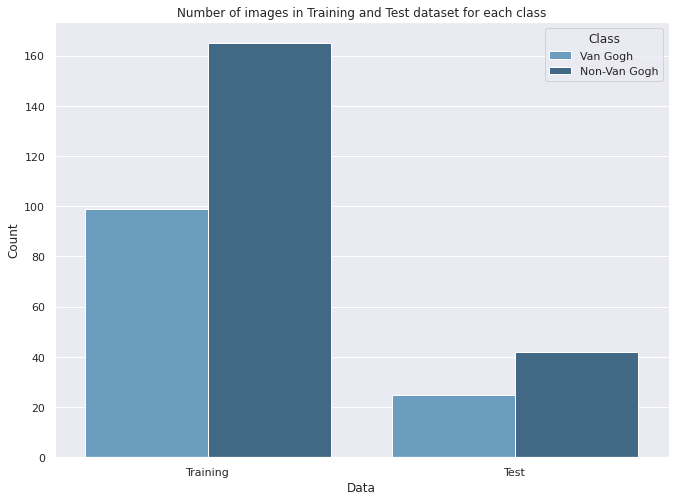

In [19]:
#Get the number of data for each class - VG and NVG in Training dataset and Test dataset.

from prettytable import PrettyTable

dataTable = PrettyTable(["Data", "Van Gogh", "Non-Van Gogh","Total"])
  
# Add rows
dataTable.add_row(["Training", len(train_vg_data), len(train_nvg_data), len(no_train_data)])
dataTable.add_row(["Test", len(test_vg_data), len(test_nvg_data), len(no_test_data)])

print('='*200)
print("The number of images in Training and Test Dataset in each class")
print('='*200)

print(dataTable)


dataCnt_df = pd.DataFrame()
dataCnt_df['Data'] = ['Training','Training','Test','Test']
dataCnt_df['Class'] = ['Van Gogh','Non-Van Gogh','Van Gogh','Non-Van Gogh']
dataCnt_df['Count'] = [99,165,25,42]

dataCnt_df.head()
sns.set(rc={'figure.figsize':(11,8)})
sns.barplot(x='Data', y='Count',hue='Class',data=dataCnt_df,palette="Blues_d")
plt.title('Number of images in Training and Test dataset for each class')
plt.show()

In [ ]:
print("="*100)
print("The total number of images in the Training dataset are : " ,len(no_train_data))
print("The total number of images in the Test dataset are : " ,len(no_test_data))
print("="*100)

The total number of images in the Training dataset are :  264
The total number of images in the Test dataset are :  67


1. There are a total number of 264 images in the Training data and 67 images given for the test dataset.
2. In the training dataset, we have 99 Van Gogh images and 165 Non-Van Gogh images.
3. In the test dataset, we have 25 Van Gogh and 42 Non Van Gogh images.
4. There is a clear imbalance in the data in both training and test dataset.

A glimpse of Van Goghs paintings


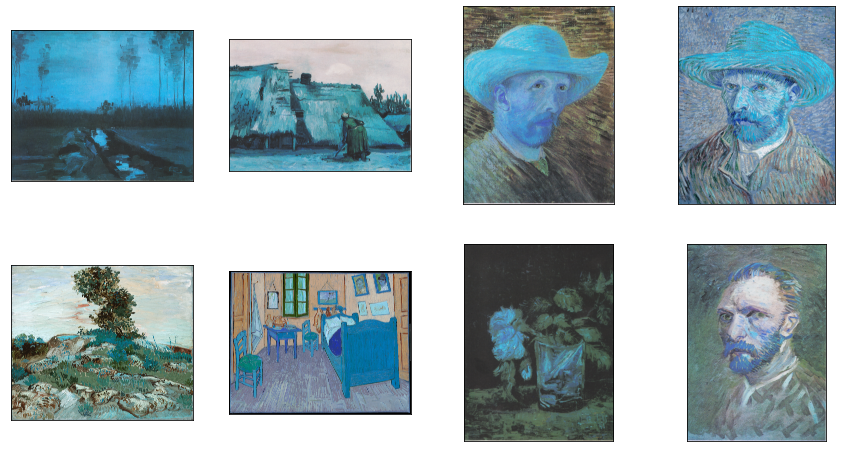

In [ ]:
print('='*100)
print('A glimpse of Van Goghs paintings')
print('='*100)

fig = plt.figure(figsize=(15, 8))
columns = 4
rows = 2

for i in range(1, columns*rows +1):
    vg_file = traindir_vg + '/' +train_vg_data[i]
    vg_img = cv2.imread(vg_file,1)
    fig.add_subplot(rows, columns, i)
    plt.xticks([]), plt.yticks([]) 
    plt.imshow(vg_img)
plt.show()

A glimpse of other artists paintings


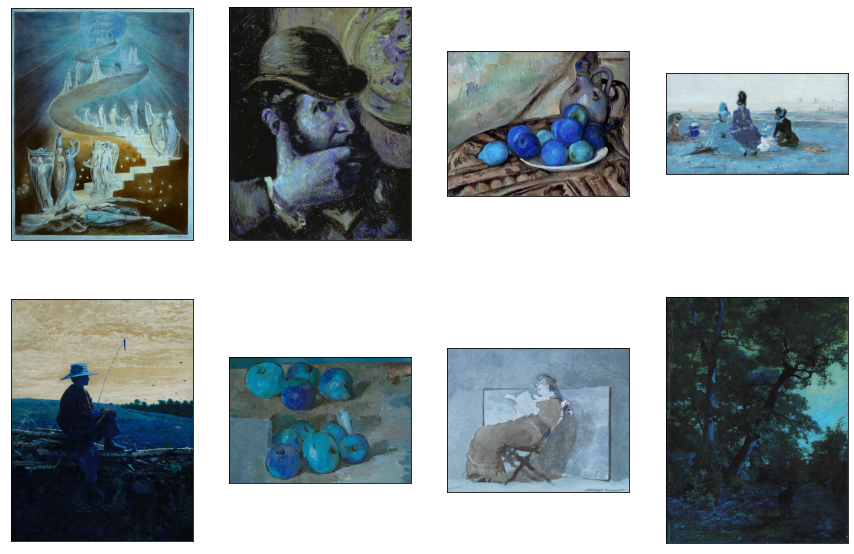

In [ ]:
print('='*100)
print('A glimpse of other artists paintings')
print('='*100)

fig = plt.figure(figsize=(15, 10))
columns = 4
rows = 2

for i in range(1, columns*rows +1):
    nvg_file = traindir_nvg + '/' +train_nvg_data[i]
    nvg_img = cv2.imread(nvg_file,1)
    fig.add_subplot(rows, columns, i)
    plt.xticks([]), plt.yticks([]) 
    plt.imshow(nvg_img)
plt.show()

##Image size analysis

In [ ]:
#Get the width and height of all images in the nvg training folder

width_list_nvg = []
height_list_nvg = []

for fname in train_nvg_data:
  nvg_file = traindir_nvg + '/' +fname
  nvg_img = cv2.imread(nvg_file,1)
  width_list_nvg.append(nvg_img.shape[0])
  height_list_nvg.append(nvg_img.shape[1])

In [ ]:
#Get the width and height of all images in the vg training folder
width_list_vg = []
height_list_vg = []

for fname in train_vg_data:
  vg_file = traindir_vg + '/' +fname
  vg_img = cv2.imread(vg_file,1)
  width_list_vg.append(vg_img.shape[0])
  height_list_vg.append(vg_img.shape[1])

In [ ]:
#Compute the average width and height of all images

avg_width_nvg = sum(width_list_nvg)/len(width_list_nvg)
avg_height_nvg = sum(height_list_nvg)/len(height_list_nvg)

avg_width_vg = sum(width_list_vg)/len(width_list_vg)
avg_height_vg = sum(height_list_vg)/len(height_list_vg)

In [ ]:
print('='*100)
print('The average width of the Van Gogh painting images are ', avg_width_vg)
print('The average height of the Van Gogh painting images are ', avg_height_vg)
print('='*100)

print('The average width of the other artists painting images are ', avg_width_nvg)
print('The average height of the other artists painting images are ', avg_height_nvg)
print('='*100)

The average width of the Van Gogh painting images are  2821.050505050505
The average height of the Van Gogh painting images are  2794.3939393939395
The average width of the other artists painting images are  2724.1878787878786
The average height of the other artists painting images are  2969.860606060606


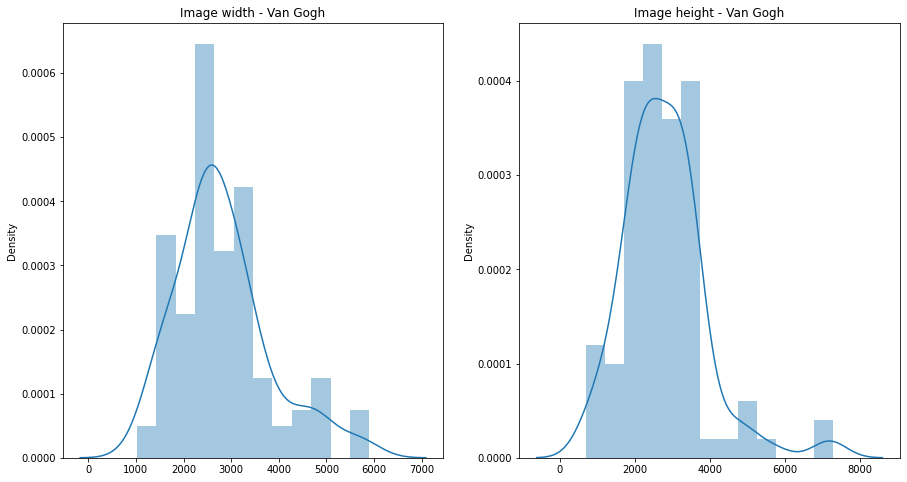

In [ ]:
fig, ax =plt.subplots(1,2, figsize=(15, 8))

sns.distplot(width_list_vg, ax=ax[0])
ax[0].set_title('Image width - Van Gogh')
sns.distplot(height_list_vg, ax=ax[1])
ax[1].set_title('Image height - Van Gogh')
fig.show()

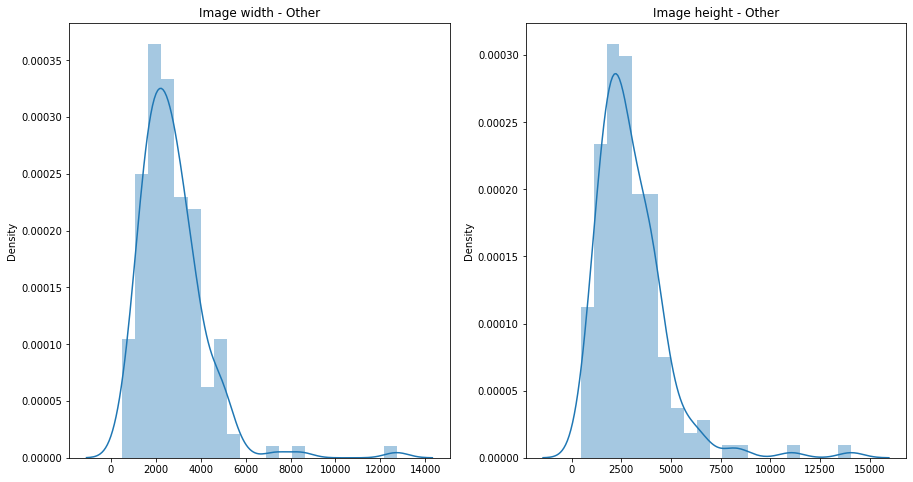

In [ ]:
fig, ax =plt.subplots(1,2, figsize=(15, 8))

sns.distplot(width_list_nvg, ax=ax[0])
ax[0].set_title('Image width - Other')
sns.distplot(height_list_nvg, ax=ax[1])
ax[1].set_title('Image height - Other')
fig.show()

The width and height of the images of other artists paintings are plotted here.

The maximum width of these paintings is almost 14000 and there is a significant number of paintings that have a width equal to or greater than 2000. 

The maximum height of these paintings is almost 15000 and there is a significant number of paintings that have a width of over 2000. 

So, we know that the images in the training dataset are incredibly huge.

In [ ]:
tr_width = []
tr_width.extend(width_list_nvg)
tr_width.extend(width_list_vg)

tr_height = []
tr_height.extend(height_list_nvg)
tr_height.extend(height_list_vg)



aspect_ratio_tr = [int(x)/int(y) for x, y in zip(tr_width,tr_height)]


Text(0.5, 1.0, 'Aspect ratio (height/width) distribution')

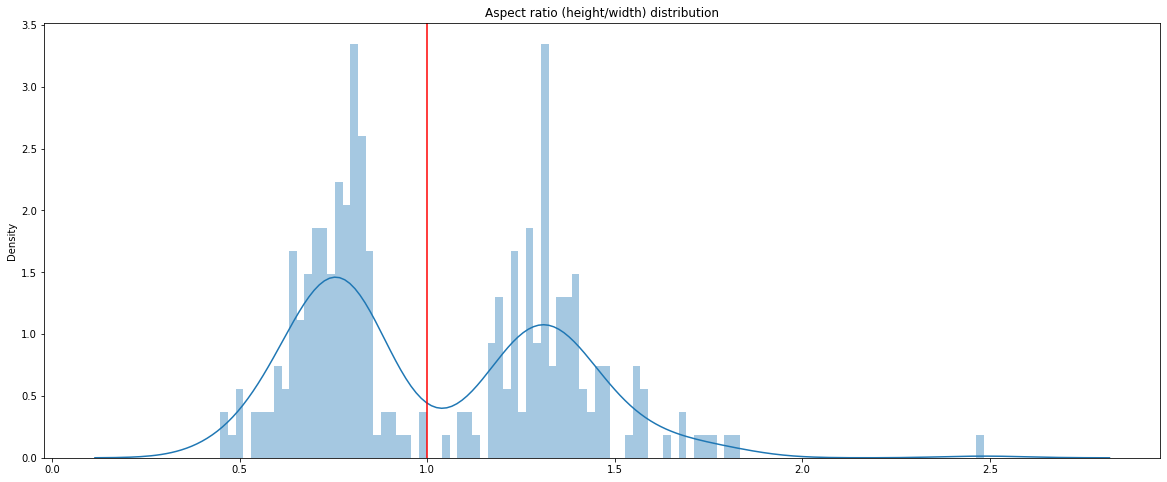

In [ ]:
plt.subplots(figsize=(20, 8))
sns.distplot(aspect_ratio_tr, bins=100)

plt.axvline(x=1, color='red', label='x=1')
plt.title('Aspect ratio (height/width) distribution')

The aspect ratio for all training data is plotted here. It is observed that there are a significant number of images where the width is larger than the height.The red line denotes an aspect ratio of 1 signifying square shaped(equal width and height) images.
As observed, most of the images are more in the rectangular shaped.

In [ ]:
width_list_nvg_test = []
height_list_nvg_test = []

for fname in test_nvg_data:
  nvg_file = testdir_nvg + '/' +fname
  nvg_img = cv2.imread(nvg_file,1)
  width_list_nvg_test.append(nvg_img.shape[0])
  height_list_nvg_test.append(nvg_img.shape[1])

width_list_vg_test = []
height_list_vg_test = []

for fname in test_vg_data:
  vg_file = testdir_vg + '/' +fname
  vg_img = cv2.imread(vg_file,1)
  width_list_vg_test.append(vg_img.shape[0])
  height_list_vg_test.append(vg_img.shape[1])

In [ ]:
avg_width_nvg_test = sum(width_list_nvg_test)/len(width_list_nvg_test)
avg_height_nvg_test = sum(height_list_nvg_test)/len(height_list_nvg_test)

avg_width_vg_test = sum(width_list_vg_test)/len(width_list_vg_test)
avg_height_vg_test = sum(height_list_vg_test)/len(height_list_vg_test)

In [ ]:
print('='*100)
print('The average width of the Van Gogh painting images in test data are ', avg_width_vg_test)
print('The average height of the Van Gogh painting images in test data are ', avg_height_vg_test)
print('='*100)

print('The average width of the other artists painting images in test data are ', avg_width_nvg_test)
print('The average height of the other artists painting images in test data are ', avg_height_nvg_test)
print('='*100)

The average width of the Van Gogh painting images in test data are  2580.2
The average height of the Van Gogh painting images in test data are  2883.96
The average width of the other artists painting images in test data are  2939.0714285714284
The average height of the other artists painting images in test data are  3251.8333333333335


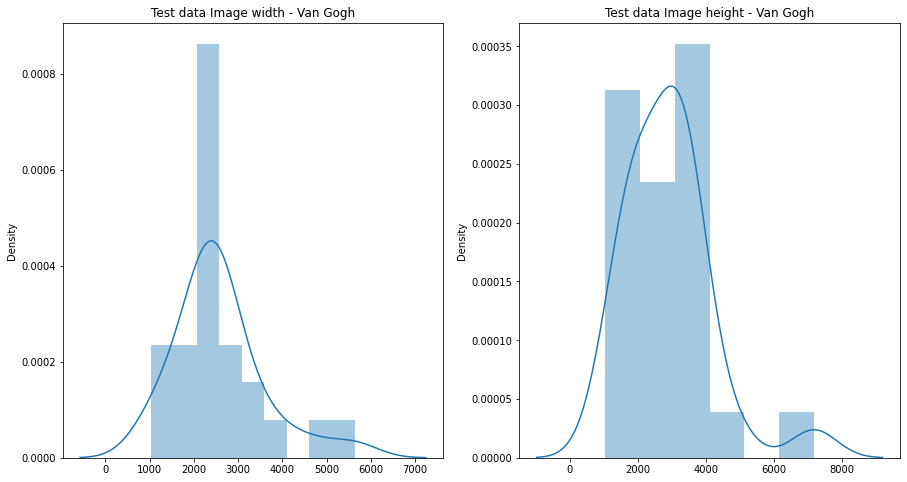

In [ ]:
fig, ax =plt.subplots(1,2, figsize=(15, 8))

sns.distplot(width_list_vg_test, ax=ax[0])
ax[0].set_title('Test data Image width - Van Gogh')
sns.distplot(height_list_vg_test, ax=ax[1])
ax[1].set_title('Test data Image height - Van Gogh')
fig.show()

The width and height of the images of Van Gogh's paintings are plotted here.

The maximum width of these paintings is around 7000 and there is a significant number of paintings that have a width equal to or greater than 2000.

The maximum height of these paintings is just over 8000 and there is a significant number of paintings that have a height of over 1000.

So, we know that the images in the test dataset are also large images.

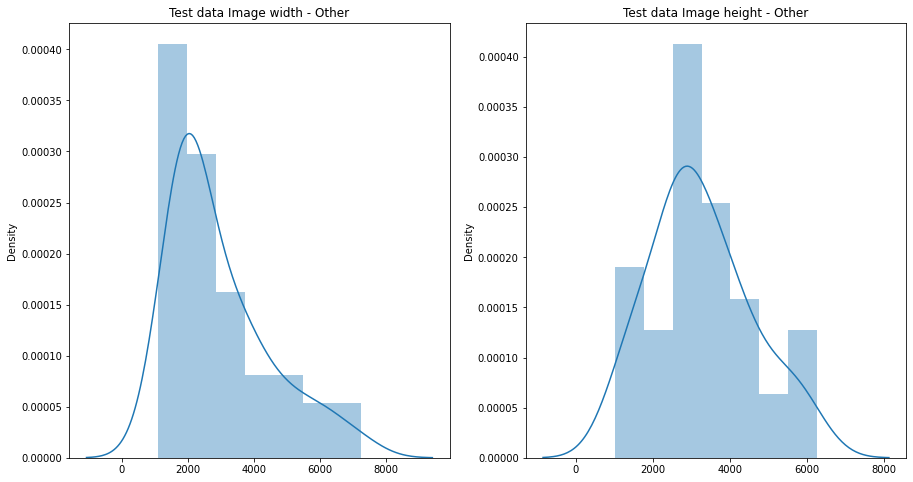

In [ ]:
fig, ax =plt.subplots(1,2, figsize=(15, 8))

sns.distplot(width_list_nvg_test, ax=ax[0])
ax[0].set_title('Test data Image width - Other')
sns.distplot(height_list_nvg_test, ax=ax[1])
ax[1].set_title('Test data Image height - Other')
fig.show()

The width and height of the images of other artists paintings are plotted here.

The maximum width of these paintings is around 9000 and there is a significant number of paintings that have a width equal to or greater than 1500.

The maximum height of these paintings is almost 8000 and there is a significant number of paintings that have a height of over 2000.

So, we know that the images in the test dataset are also large images.

In [ ]:
tr_width_test = []
tr_width_test.extend(width_list_nvg_test)
tr_width_test.extend(width_list_vg_test)

tr_height_test = []
tr_height_test.extend(height_list_nvg_test)
tr_height_test.extend(height_list_vg_test)



aspect_ratio_te = [int(x)/int(y) for x, y in zip(tr_width_test,tr_height_test)]

Text(0.5, 1.0, 'Aspect ratio (height/width) distribution - Test data')

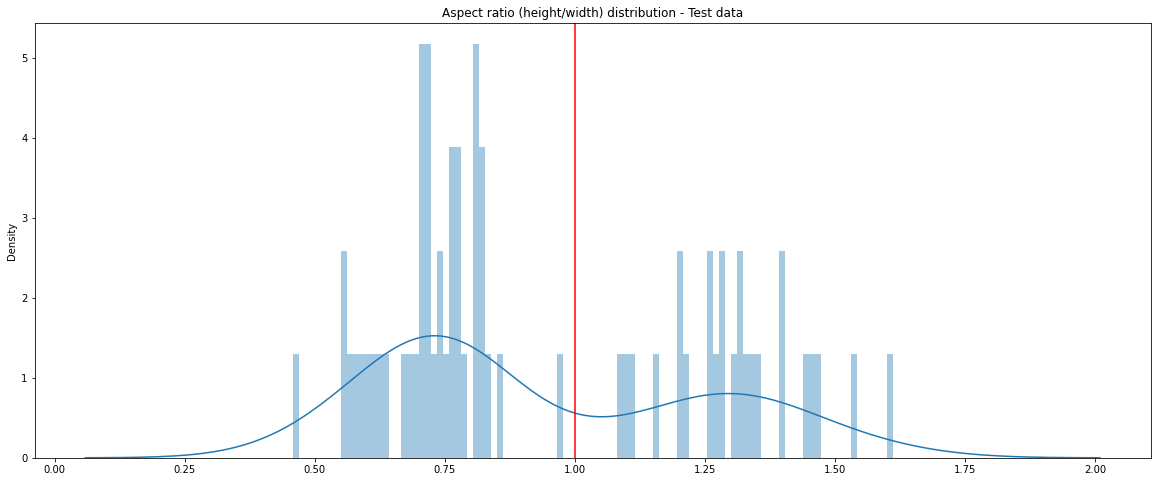

In [ ]:
plt.subplots(figsize=(20, 8))
sns.distplot(aspect_ratio_te, bins=100)

plt.axvline(x=1, color='red', label='x=1')
plt.title('Aspect ratio (height/width) distribution - Test data')

The aspect ratio for all test data is plotted here. It is observed that there are quite a few number of images where the width is larger than the height.The red line denotes an aspect ratio of 1 signifying square shaped(equal width and height) images. As observed, most of the images are more in the rectangular shaped.

##Patch Extraction and display

In [ ]:
from sklearn.model_selection import train_test_split

X=train_vg_data
X_train_vg, X_cv_vg= train_test_split(X, test_size=0.33, random_state=42)

In [ ]:
X=train_nvg_data
X_train_nvg, X_cv_nvg= train_test_split(X, test_size=0.33, random_state=42)

In [ ]:
import random
from skimage.util import view_as_windows
from matplotlib.pyplot import imread, imsave

step_size =224


def extract_patches(patch_size,no_patches,img_path,img_name,patch_dir):
  
  img = imread(img_path,1)
  
  width = img.shape[0]
  height = img.shape[1]

  x_range = width - patch_size
  y_range = height - patch_size

  pos_x = int(((img.shape[0] - patch_size) % step_size)/2)
  pos_y = int(((img.shape[1] - patch_size) % step_size)/2)

  img = img[pos_x:, pos_y:, :]

  patch_shape = (patch_size, patch_size, img.shape[2])

  view = view_as_windows(img, patch_shape, step_size)

  n=0
  for i in range(view.shape[0]):
    for j in range(view.shape[1]):
       tmp_view = view[i, j, 0, :, :, :]
       imsave(patch_dir+img_name+str(n)+'.png',tmp_view)
       n+=1
  
  print('{0} patches generated for {1}'.format(n,img_name))
  
  return n

In [ ]:
pd.DataFrame(X_train_nvg).to_csv(traindir+'/X_train_nvg.csv')
pd.DataFrame(X_train_vg).to_csv(traindir+'/X_train_vg.csv')
pd.DataFrame(X_cv_nvg).to_csv(validdir+'/X_cv_nvg.csv')
pd.DataFrame(X_cv_vg).to_csv(validdir+'/X_cv_vg.csv')

In [ ]:
#Generating patches for NVG Training images

no_patches_tr_nvg = 0

patch_dir_tr_nvg = traindir+'/patches/patch_tr_nvg/'
df_tr_nvg = pd.DataFrame()

img_list = []
n_patches =[]
for imgName in X_train_nvg:
  fname = imgName.split('.') 
  img_path   = traindir_nvg + '/' + imgName
  n= extract_patches(224,0,img_path,fname[0],patch_dir_tr_nvg)
  n_patches.append(n)
  img_list.append(fname[0])
  no_patches_tr_nvg +=n

df_tr_nvg['Img_name'] = img_list
df_tr_nvg['n_patches'] = n_patches

32 patches generated for nvg_31339154
228 patches generated for nvg_22337555
12 patches generated for nvg_19331132
247 patches generated for nvg_149071
42 patches generated for nvg_18824494
66 patches generated for nvg_10770177
210 patches generated for nvg_19212307
180 patches generated for nvg_19108352
1568 patches generated for nvg_20867663
208 patches generated for nvg_19106540
352 patches generated for nvg_23881908
140 patches generated for nvg_17713396
135 patches generated for nvg_26854633
63 patches generated for nvg_18345871
170 patches generated for nvg_21906981
252 patches generated for nvg_23609262
180 patches generated for nvg_7867410
357 patches generated for nvg_21997150
77 patches generated for nvg_36063197
3472 patches generated for nvg_8332724
35 patches generated for nvg_18555269
96 patches generated for nvg_21730756
42 patches generated for nvg_33285874
234 patches generated for nvg_22490586
300 patches generated for nvg_23569201
216 patches generated for nvg_219087

In [ ]:
#Generating patches for VG Training images
no_patches_tr_vg = 0

patch_dir_tr_vg = traindir+'/patches/patch_tr_vg/'
df_tr_vg = pd.DataFrame()

img_list = []
n_patches =[]
for imgName in X_train_vg:
  fname = imgName.split('.') 
  img_path   = traindir_vg + '/' + imgName
  n= extract_patches(224,0,img_path,fname[0],patch_dir_tr_vg)
  n_patches.append(n)
  img_list.append(fname[0])
  no_patches_tr_vg +=n

df_tr_vg['Img_name'] = img_list
df_tr_vg['n_patches'] = n_patches


195 patches generated for vg_9402859
418 patches generated for vg_21880626
108 patches generated for vg_9427896
182 patches generated for vg_9379187
336 patches generated for vg_9502392
432 patches generated for vg_2702957
24 patches generated for vg_9420429
143 patches generated for vg_9427672
108 patches generated for vg_9403031
143 patches generated for vg_9428381
140 patches generated for vg_9428218
130 patches generated for vg_9362665
192 patches generated for vg_9436454
165 patches generated for vg_9386580
108 patches generated for vg_9394743
98 patches generated for vg_9402635
165 patches generated for vg_9436349
140 patches generated for vg_9428285
130 patches generated for vg_24041019
96 patches generated for vg_27834755
24 patches generated for vg_9420363
357 patches generated for vg_17177561
475 patches generated for vg_15415578
154 patches generated for vg_9427299
160 patches generated for vg_9453821
806 patches generated for vg_809945
154 patches generated for vg_7276652
2

In [ ]:
#Generating patches for NVG CV images
no_patches_va_nvg = 0

patch_dir_va_nvg = validdir+'/patches/patch_val_nvg/'
df_va_nvg = pd.DataFrame()

img_list = []
n_patches =[]
for imgName in X_cv_nvg:
  fname = imgName.split('.') 
  img_path   = traindir_nvg + '/' + imgName
  n= extract_patches(224,0,img_path,fname[0],patch_dir_va_nvg)
  n_patches.append(n)
  img_list.append(fname[0])
  no_patches_va_nvg +=n

df_va_nvg['Img_name'] = img_list
df_va_nvg['n_patches'] = n_patches


54 patches generated for nvg_22267023
160 patches generated for nvg_21983755
80 patches generated for nvg_21880277
63 patches generated for nvg_19072754
154 patches generated for nvg_23597199
35 patches generated for nvg_24816634
6 patches generated for nvg_21996858
66 patches generated for nvg_19072936
16 patches generated for nvg_17473975
30 patches generated for nvg_19319841
304 patches generated for nvg_22141186
144 patches generated for nvg_24803553
160 patches generated for nvg_31699808
192 patches generated for nvg_25475565
48 patches generated for nvg_6371178
192 patches generated for nvg_28595835
360 patches generated for nvg_2606381
340 patches generated for nvg_23592980
24 patches generated for nvg_8040213
110 patches generated for nvg_7284207
18 patches generated for nvg_10783832
285 patches generated for nvg_23568864
228 patches generated for nvg_33826989
285 patches generated for nvg_22009453
192 patches generated for nvg_21993962
418 patches generated for nvg_8947760
208

In [ ]:
#Generating patches for VG CV images
no_patches_va_vg = 0

patch_dir_va_vg = validdir+'/patches/patch_val_vg/'
df_va_vg = pd.DataFrame()

img_list = []
n_patches =[]
for imgName in X_cv_vg:
  fname = imgName.split('.') 
  img_path   = traindir_vg + '/' + imgName
  n= extract_patches(224,0,img_path,fname[0],patch_dir_va_vg)
  n_patches.append(n)
  img_list.append(fname[0])
  no_patches_va_vg +=n

df_va_vg['Img_name'] = img_list
df_va_vg['n_patches'] = n_patches


130 patches generated for vg_26873520
315 patches generated for vg_9420622
99 patches generated for vg_34854099
304 patches generated for vg_35997386
180 patches generated for vg_9420564
54 patches generated for vg_9413641
140 patches generated for vg_9367533
255 patches generated for vg_9485706
100 patches generated for vg_9451652
80 patches generated for vg_9478303
195 patches generated for vg_9453890
165 patches generated for vg_9386622
117 patches generated for vg_9103208
195 patches generated for vg_17996029
130 patches generated for vg_9502466
154 patches generated for vg_6491390
100 patches generated for vg_9100630
63 patches generated for vg_9107153
88 patches generated for vg_21880259
84 patches generated for vg_9363025
63 patches generated for vg_9421829
140 patches generated for vg_9372026
154 patches generated for vg_9371066
15 patches generated for vg_35168556
154 patches generated for vg_9395122
112 patches generated for vg_9361739
88 patches generated for vg_9394799
54 p

In [ ]:
#Generating patches for VG Test images
no_patches_te_vg = 0

patch_dir_te_vg = testdir+'/patch_te_vg/'
df_te_vg = pd.DataFrame()

img_list = []
n_patches =[]
for imgName in test_vg_data:
  fname = imgName.split('.') 
  img_path   = testdir_vg + '/' + imgName
  n= extract_patches(224,0,img_path,fname[0],patch_dir_te_vg)
  n_patches.append(n)
  img_list.append(fname[0])
  no_patches_te_vg +=n

df_te_vg['Img_name'] = img_list
df_te_vg['n_patches'] = n_patches

130 patches generated for vg_9378884
144 patches generated for vg_9100648
88 patches generated for vg_9387502
120 patches generated for vg_9516223
120 patches generated for vg_9463012
80 patches generated for vg_9421984
54 patches generated for vg_9436384
180 patches generated for vg_9413420
340 patches generated for vg_17177301
154 patches generated for vg_9414279
96 patches generated for vg_9103139
255 patches generated for vg_9494947
32 patches generated for vg_9281980
108 patches generated for vg_9106795
140 patches generated for vg_9427795
154 patches generated for vg_9110201
154 patches generated for vg_9386980
48 patches generated for vg_9443864
24 patches generated for vg_9471412
800 patches generated for vg_151874
80 patches generated for vg_9463608
195 patches generated for vg_9514157
88 patches generated for vg_9506505
28 patches generated for vg_33566806
315 patches generated for vg_22263227


In [ ]:
#Generating patches for NVG Test images
no_patches_te_nvg = 0

patch_dir_te_nvg = testdir+'/patch_te_nvg/'
df_te_nvg = pd.DataFrame()

img_list = []
n_patches =[]
for imgName in test_nvg_data:
  fname = imgName.split('.') 
  img_path   = testdir_nvg + '/' + imgName
  n= extract_patches(224,0,img_path,fname[0],patch_dir_te_nvg)
  n_patches.append(n)
  img_list.append(fname[0])
  no_patches_te_nvg +=n

df_te_nvg['Img_name'] = img_list
df_te_nvg['n_patches'] = n_patches

96 patches generated for nvg_32709917
42 patches generated for nvg_14943497
120 patches generated for nvg_18581296
285 patches generated for nvg_23768590
96 patches generated for nvg_37306601
475 patches generated for nvg_21997189
42 patches generated for nvg_22051210
24 patches generated for nvg_10582548
289 patches generated for nvg_37662889
84 patches generated for nvg_18935581
96 patches generated for nvg_23900199
180 patches generated for nvg_9780042
32 patches generated for nvg_24436341
192 patches generated for nvg_27065927
315 patches generated for nvg_10658644
96 patches generated for nvg_26635422
48 patches generated for nvg_22189100
572 patches generated for nvg_26188226
475 patches generated for nvg_22493218
170 patches generated for nvg_22126474
273 patches generated for nvg_21880515
375 patches generated for nvg_24782382
140 patches generated for nvg_16022414
391 patches generated for nvg_23820938
96 patches generated for nvg_25164508
88 patches generated for nvg_22784729

In [ ]:
from prettytable import PrettyTable
patch_summary = PrettyTable(["Dataset","Class", "Images", "Patches"])
  
# Add rows
patch_summary.add_row(["Training",'Van Gogh' ,len(df_tr_vg['Img_name']), no_patches_tr_vg])
patch_summary.add_row(["Training",'non - Van Gogh' ,len(df_tr_nvg['Img_name']), no_patches_tr_nvg])
patch_summary.add_row(["Test",'Van Gogh' ,len(df_te_vg['Img_name']), no_patches_te_vg])
patch_summary.add_row(["Test",'non-Van Gogh' ,len(df_te_nvg['Img_name']), no_patches_te_nvg])


print("The number of images and patches generated for training and test dataset")
print(patch_summary)


The number of images and patches generated for training and test dataset
+----------+----------------+--------+---------+
| Dataset  |     Class      | Images | Patches |
+----------+----------------+--------+---------+
| Training |    Van Gogh    |   99   |  15895  |
| Training | non - Van Gogh |  165   |  31513  |
|   Test   |    Van Gogh    |   25   |   3927  |
|   Test   |  non-Van Gogh  |   42   |   8611  |
+----------+----------------+--------+---------+


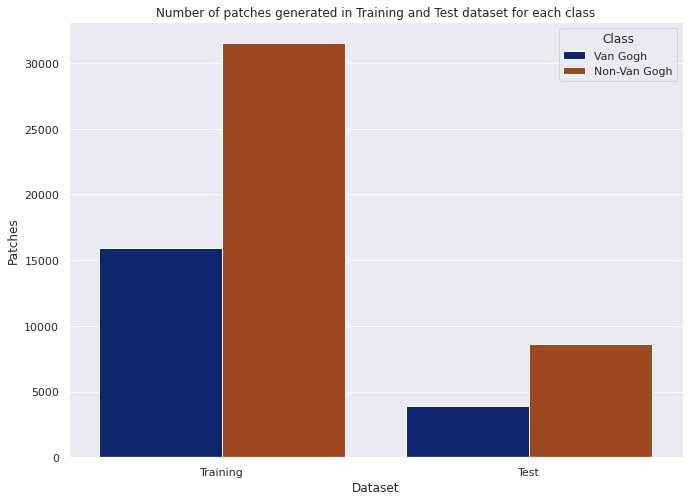

In [22]:
patches_df = pd.DataFrame()

patches_df['Dataset'] = ['Training','Training','Test','Test']
patches_df['Class'] = ['Van Gogh','Non-Van Gogh','Van Gogh','Non-Van Gogh']
patches_df['Patches'] = [15895,31513,3927,8611]

sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(11,8)})
sns.barplot(x='Dataset',y='Patches',hue='Class',data=patches_df,palette="dark")
plt.title('Number of patches generated in Training and Test dataset for each class')
plt.show()


We have generated patches for the entire width and height of all the images. 

The number of patches generated for NVG is almost twice of that of the patches generated for VG. This is observed for both Training dataset and Test dataset.

This occurs because there are more number of images for Non-VG than VG class. Apart from this, the width and height of the images under the Non-VG category is much higher than the VG category.



In [ ]:
patch_total = PrettyTable(["Dataset","Total Images", "Total Patches"])
  
# Add rows
patch_total.add_row(["Training",len(df_tr_vg['Img_name'])+len(df_tr_nvg['Img_name']),no_patches_tr_vg+no_patches_tr_nvg])
patch_total.add_row(["Test",len(df_te_vg['Img_name'])+len(df_te_nvg['Img_name']),no_patches_te_vg+no_patches_te_nvg])

print("The total number of images and patches generated for training and test dataset")
print(patch_total)

The total number of images and patches generated for training and test dataset
+----------+--------------+---------------+
| Dataset  | Total Images | Total Patches |
+----------+--------------+---------------+
| Training |     264      |     47408     |
|   Test   |      67      |     12538     |
+----------+--------------+---------------+


The number of patches generated for the total number of images is roughly 180 times.

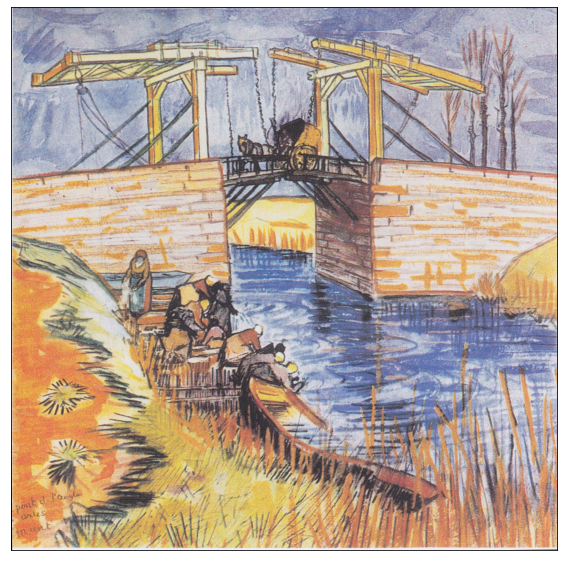

In [ ]:
fig = plt.figure(figsize=(15, 10))

vg_file = traindir_vg + '/' +df_tr_vg['Img_name'][10]+'.png'
vg_img = imread(vg_file,1)

plt.xticks([]), plt.yticks([]) 
plt.imshow(vg_img)
plt.show()

In [ ]:
df_tr_vg = pd.read_csv(traindir+'/tr_vg.csv')

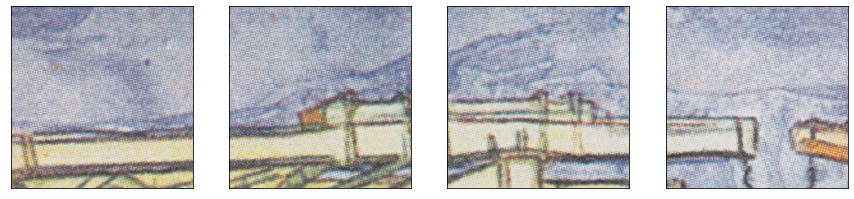

In [ ]:
fig = plt.figure(figsize=(15, 10))

fileName = df_tr_vg['Img_name'][10]

for i in range(1,5):
    tmp_file = patch_dir_tr_vg + '/' +fileName+str(i)+'.png'
    tmp_img = imread(tmp_file,1)
    fig.add_subplot(1, 4, i)
    plt.xticks([]), plt.yticks([]) 
    plt.imshow(tmp_img)
plt.show()

A training dataset and a test dataset is given with a set of images belonging to Van gogh and other artists. The images have been categorized into separate folders.

In the training dataset, we have 99 Van Gogh images and 165 Non-Van Gogh images. In the test dataset, we have 25 Van Gogh and 42 Non Van Gogh images.

There is a clear imbalance in the number of images available for Van Gogh. The number of non-Van Gogh images are almost twice the images available for Non-Van Gogh.

The images were analysed for their size and shape.The images are of varying sizes. It was found that the average width and height are over 2500 pixels. Some images were found to be very large almost over 14K pixels. Almost all images were found to be of rectangular shape.

This case study analyses patches of the images. Hence patches for the entire width and height of the images were created.
This took a considerable amount of time to generate all these patches.

There is an imbalance with the number of patches generated for VG and non-VG.

An approach to handle this imbalance can be to ensure equal number of patches for VG and NVG.
